# Questions we are going to respond to using the power of pandas
Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ? <br>
Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.<br>
Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.<br>
Q. 4) Show all the Movies that were released in year 2020.<br>
Q. 5) Show only the Titles of all TV Shows that were released in US only.<br>
Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?<br>
Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".<br>
Q. 8) In how many movies/shows, Tom Cruise was cast ?<br>
Q. 9) What are the different Ratings defined by Netflix ?<br>
Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?<br>
Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?<br>
Q. 10) What is the maximum duration of a Movie/Show on Netflix ?<br>
Q. 11) Which individual country has the Highest No. of TV Shows ?<br>
Q. 12) How can we sort the dataset by Year ?<br>
Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
df=pd.read_csv('Netflix Dataset.csv',parse_dates=['Release_Date'])

## General informations about the dataset

In [9]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Checking for duplicates

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

### Checking for null values

In [12]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

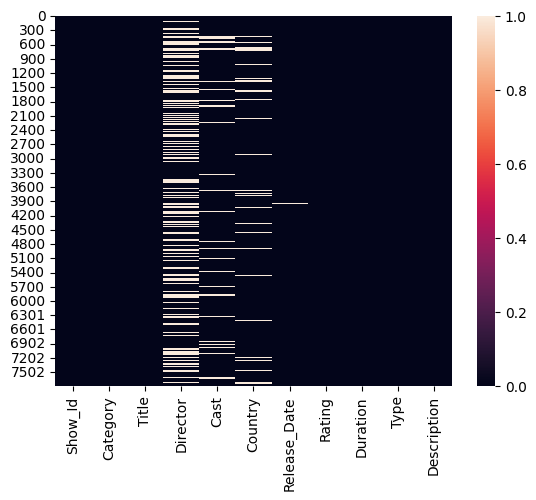

In [13]:
sns.heatmap(df.isna())

In [14]:
df[df['Rating'].isna()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [17]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

## Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [20]:
df[df['Title']=='House of Cards'][['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


## Q. 2) In which year the highest number of the TV Shows & Movies were released ? 

In [21]:
import datetime as dt

In [189]:
df.groupby(df['Release_Date'].dt.year)['Show_Id'].count().sort_values(ascending=False).head(1)

Release_Date
2019.0    2153
Name: Show_Id, dtype: int64

In [67]:
#To remove nan values so the year would be int and not float example the year would be 2019 and not 2019.0
df.loc[(~df['Release_Date'].isna())]['Release_Date'].dt.year

0       2020
1       2016
2       2018
3       2017
4       2020
        ... 
7784    2020
7785    2019
7786    2020
7787    2020
7788    2020
Name: Release_Date, Length: 7777, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020'),
  Text(13, 0, '2021')])

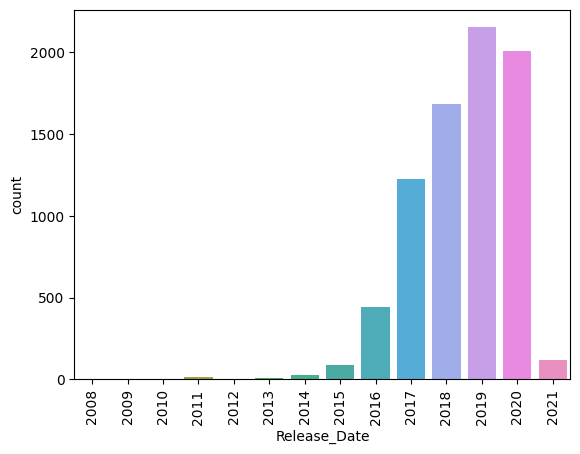

In [68]:
sns.countplot(data=df,x=df.loc[(~df['Release_Date'].isna())]['Release_Date'].dt.year)
plt.xticks(rotation=90)

## Q. 3) How many Movies & TV Shows are in the dataset ? 

In [69]:
df['Category'].value_counts()

Movie      5377
TV Show    2410
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

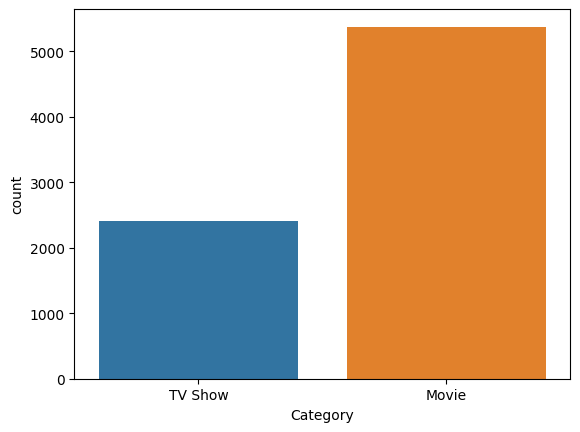

In [70]:
sns.countplot(data=df,x='Category')

## Q. 4) Show all the Movies that were released in year 2020.

In [96]:
sum(df['Release_Date'].dt.year==2020)

2009

In [97]:
df[(df['Category']=='Movie') & (df['Release_Date'].dt.year==2020)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol..."
...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2020-05-19,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


## Q. 5) Show only the Titles of all TV Shows that were released in US only.

In [98]:
df['Country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

The country column should be cleaned there is some unconsistency 

In [115]:
df[(df['Country'].str.strip()=='United States') & (df['Category']=='TV Show')]['Title']

26                                (Un)Well
29                                #blackAF
53                              100 Humans
63                          13 Reasons Why
64      13 Reasons Why: Beyond the Reasons
                       ...                
7714                          Yo-Kai Watch
7723                                   You
7732                          You vs. Wild
7737                        Young & Hungry
7757                              Z Nation
Name: Title, Length: 705, dtype: object

## Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [123]:
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

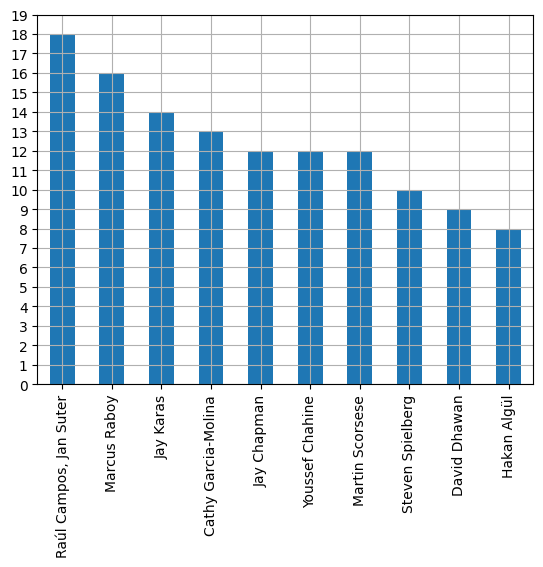

In [134]:
df['Director'].value_counts().head(10).plot(kind='bar')
plt.yticks(ticks=[x for x in range(20)])
plt.grid(True)
plt.show()

## Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [135]:
df.loc[(df['Category']=='Movie') & ((df['Type']=='Comedies') | (df['Country']=='United Kingdom'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...
...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."


## Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [142]:
sum(df[~df['Cast'].isna()]['Cast'].str.contains('Tom Cruise',case=False))


2

## Q. 9) What are the different Ratings defined by Netflix ?

In [143]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [146]:
df['Rating'].dropna().unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [148]:
len(df.loc[(df['Category']=='Movie') & (df['Rating']=='TV-14') & (df['Country']=='Canada')])

11

## Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [151]:
sum((df['Category']=='TV Show') & (df['Rating']=='R') & (df['Release_Date'].dt.year>=2018))

1

## Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [170]:
#maximum duration of a movie in minutes
df[df['Category']=='Movie']['Duration'].str.split(" ").apply(lambda x : x[0]).astype('int').max()

312

In [172]:
#maximum duration of a tv show in seasons
df[df['Category']=='TV Show']['Duration'].str.split(" ").apply(lambda x : x[0]).astype('int').max()

16

## Q. 11) Which individual country has the Highest No. of TV Shows ?

In [179]:
df[df['Category']=='TV Show'].groupby('Country')['Show_Id'].count().sort_values(ascending=False).head(1)

Country
United States    705
Name: Show_Id, dtype: int64

## Q. 12) sort the dataset by Year 

In [187]:
df.sort_values('Release_Date').head(10)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r..."
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...
3221,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,2011-09-27,TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...
7416,s7415,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,2011-10-01,TV-14,93 min,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...
7364,s7363,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,2011-10-01,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...
2962,s2963,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,2011-10-01,TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...


## Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [190]:
df.loc[((df['Category']=='Movie') & (df['Type']=='Dramas')) | ((df['Category']=='TV Show') & (df['Type']=="Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States",2019-12-15,R,110 min,Dramas,A ruthless corporate headhunter battles his ri...
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th..."
7717,s7716,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
7719,s7718,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...
